In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Import all the images as a datase

#Reads in x_train and y_train values from a folder
def get_shape_data(address, shape): # returns labeled set of one label type 

    training_set_size = len(os.listdir(f"{address}/{shape}"))

    if address == f"shape_recognition/shapesdataset/training_set":
        shape_number = 41
        index_difference = 41
    else:
        shape_number = 1
        index_difference = 1
	

    x = np.empty((training_set_size, 64, 64))
    y = np.full(training_set_size, 0)
    # y = np.full(training_set_size,shape, dtype='<U20')
    

    while os.path.isfile(f"{address}/{shape}/{shape}_{"{:02d}".format(shape_number)}.jpg"): # so long as there is a shape here, excuse gross address formatting
        try:
            img = cv2.imread(f"{address}/{shape}/{shape}_{"{:02d}".format(shape_number)}.jpg")[:,:,0]
            img = np.invert(np.array([img]))
            x[shape_number - index_difference] = img #again, indexing is broken because of how dataset is labelled
            y[shape_number - index_difference] = shapes.index(shape)
            # y[shape_number - index_difference] = shape
        except:
            #Failed
            print("Error because Harry is an idiot!")
        finally:
            shape_number += 1
            #idfk how this works
    return (x, y)

def get_dataset(address, shapes): # returns all labelled data from a dataset
    for i in range(len(shapes)):
        (x_new, y_new) = get_shape_data(address, shapes[i])
  
        # plt.imshow(x_new[1], cmap = plt.cm.binary)
        # plt.show()

        if i == 0:
            x = x_new
            y = y_new
            continue

        x = np.append(x, x_new, 0)
        y = np.append(y, y_new, 0)

    return (x, y)

In [8]:


addresses = [f"shape_recognition/shapesdataset/training_set",
             f"shape_recognition/shapesdataset/test_set"]

                            # Indices:
                            # --------
shapes = [f"angleCross",    # 0
          f"ellipse",       # 1
          f"hexagon",       # 2
          f"line",          # 3
          f"square",        # 4
          f"straightCross", # 5
          f"triangle"]      # 6


In [9]:
(x_train, y_train) = get_dataset(addresses[0], shapes) #training data
(x_test, y_test) = get_dataset(addresses[1], shapes) #testing data

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/shape_recognition/shapesdataset/training_set/angleCross'

In [4]:
max_epochs = 10
epochs = np.linspace(1, max_epochs, max_epochs)
loss_list = []
accuracy_list = []

# Generates many models for a bunch of epochs to see which is most effective
for i in epochs:
    model = tf.keras.models.Sequential()
    # model.add(tf.keras.layers.Flatten(input_shape = (64,64)))

    model.add(tf.keras.layers.Conv2D(2,5, activation='relu',input_shape=(64,64,1)))
    model.add(tf.keras.layers.Flatten(input_shape=(60,60)))

    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=int(i))

    loss, accuracy = model.evaluate(x_test, y_test)
    
    loss_list.append(loss)
    accuracy_list.append(accuracy)

c:\Users\harry\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\harry\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.9267
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3433 - loss: 1.9277  
Epoch 1/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.9267
Epoch 2/2
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.8506
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3460 - loss: 1.9114  
Epoch 1/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.9267
Epoch 2/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.8506
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.7759
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3433 - loss: 1.9070  
Epoch 1/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.9267
Epoch 2/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.8506
Epoch 3/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.7759
Epoch 4/4
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

For 1 epochs we have 1.9457 loss and 0.1429 accuracy
For 2 epochs we have 1.9534 loss and 0.1464 accuracy
For 3 epochs we have 1.9562 loss and 0.1429 accuracy
For 4 epochs we have 1.9682 loss and 0.1429 accuracy
For 5 epochs we have 1.9569 loss and 0.1429 accuracy
For 6 epochs we have 1.9617 loss and 0.1429 accuracy
For 7 epochs we have 1.9709 loss and 0.1429 accuracy
For 8 epochs we have 1.9801 loss and 0.1429 accuracy
For 9 epochs we have 1.9885 loss and 0.1429 accuracy
For 10 epochs we have 2.0037 loss and 0.1429 accuracy


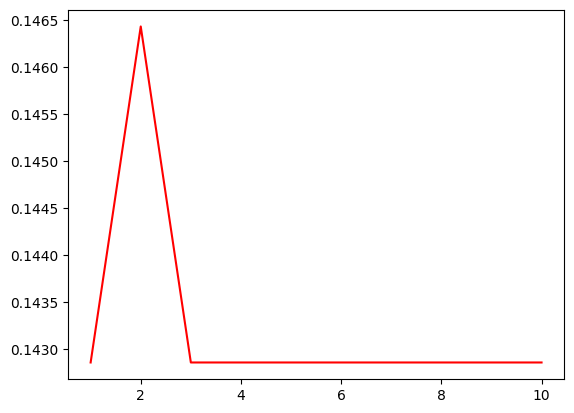

In [5]:
for i in epochs:
    print(f"For {int(i)} epochs we have {loss_list[int(i)-1]:.4f} loss and {accuracy_list[int(i)-1]:.4f} accuracy")

plt.plot(epochs, accuracy_list, color='red')
plt.show()